动态规划的核心在于**把一个全局最优问题拆解为结构稳定、可复用的子问题**。

第一，**状态定义（State）**。
必须明确：一个状态精确表示“问题在某个阶段下，已知的信息是什么”。状态要**最小且完备**，既不能缺信息导致无法转移，也不能冗余导致维度爆炸。经验上，状态往往回答“在前 i 个元素 / 到第 i 步 / 以某个条件结尾时，最优解是多少”。

第二，**状态转移（Transition）**。
这是动态规划的本质。需要找到状态之间的递推关系，通常来源于“最后一步如何来”。形式上表现为
dp[i] = min / max / sum (由若干个更小状态推导)。
一个关键检验标准是：**转移只依赖于更小规模的子问题**，不存在环依赖。

第三，**初始条件（Base Case）**。
必须给出最小规模问题的确定解，例如 dp[0]、dp[1]。
初始条件不是“为了代码不报错”，而是数学意义上的边界，否则整个递推将失去锚点。

第四，**计算顺序（Order）**。
要保证在计算 dp[i] 时，其依赖的状态已经被计算过。这决定了是自底向上（迭代）还是自顶向下（记忆化搜索）。本质上，这是对状态依赖关系的拓扑顺序安排。

第五，**结果定义与优化（Answer & Optimization）**。
需要明确：最终答案是某一个状态，还是所有状态中的最优值。同时判断是否可以进行**空间优化**（如只依赖前一两个状态，滚动数组降维）。

一句话总结：
**动态规划 = 合理的状态表达 + 无环的状态转移 + 正确的边界 + 合法的计算顺序。**
只要这四点成立，代码只是自然推导的结果。


对于动态规划问题，可以拆解为如下五步曲，

1.确定dp数组（dp table）以及下标的含义

2.确定递推公式

3.dp数组如何初始化

4.确定遍历顺序

5.举例推导dp数组

一些同学可能想为什么要先确定递推公式，然后在考虑初始化呢？
因为一些情况是递推公式决定了dp数组要如何初始化！

## 70. 爬楼梯

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢

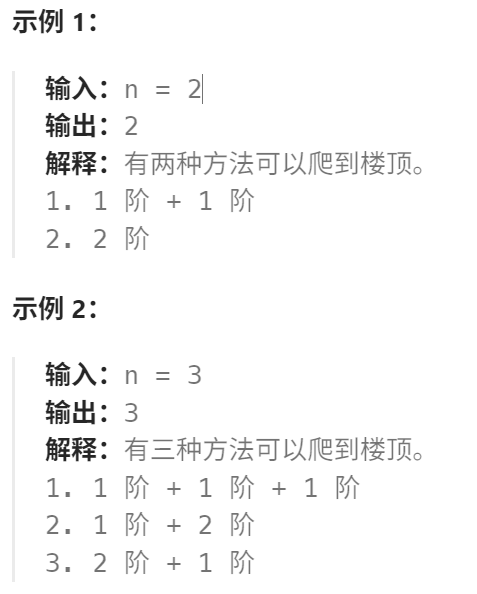


核心思路：

到第 i 阶的方法数 = 到第 i-1 阶的方法数 + 到第 i-2 阶的方法数

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        # 初始化 dp[0] 和 dp[1]
        dpi_2, dpi_1 = 1, 1  # dp[0]=1, dp[1]=1
        for _ in range(n - 1):
            # 状态转移方程
            dpi = dpi_1 + dpi_2
            # 滚动更新 dp[i-2] 和 dp[i-1] 的值
            dpi_2, dpi_1 = dpi_1, dpi
        return dpi_1
n = 1
print(Solution().climbStairs(n))

1


时间复杂度为 O(n)。函数中仅包含一次长度为 n−1 的 for 循环，每次循环只进行常数次加法与变量赋值操作，不存在嵌套循环或递归，因此整体时间随 n 线性增长。

空间复杂度为 O(1)。算法没有使用长度为 n 的 dp 数组，而是仅用三个标量变量 dpi_2、dpi_1、dpi 来滚动保存状态，所占额外空间与输入规模 n 无关，因此为常数空间复杂度。需要注意的是，这里讨论的是额外空间复杂度，不包含输入参数 n 本身。

本质上，该实现利用了状态转移方程
dp[i] = dp[i−1] + dp[i−2]，
并通过“只保留最近两个状态”完成了对标准 DP 解法的空间压缩。

---

## 118. 杨辉三角

给定一个非负整数 numRows，生成「杨辉三角」的前 numRows 行。
在「杨辉三角」中，每个数是它左上方和右上方的数的和。

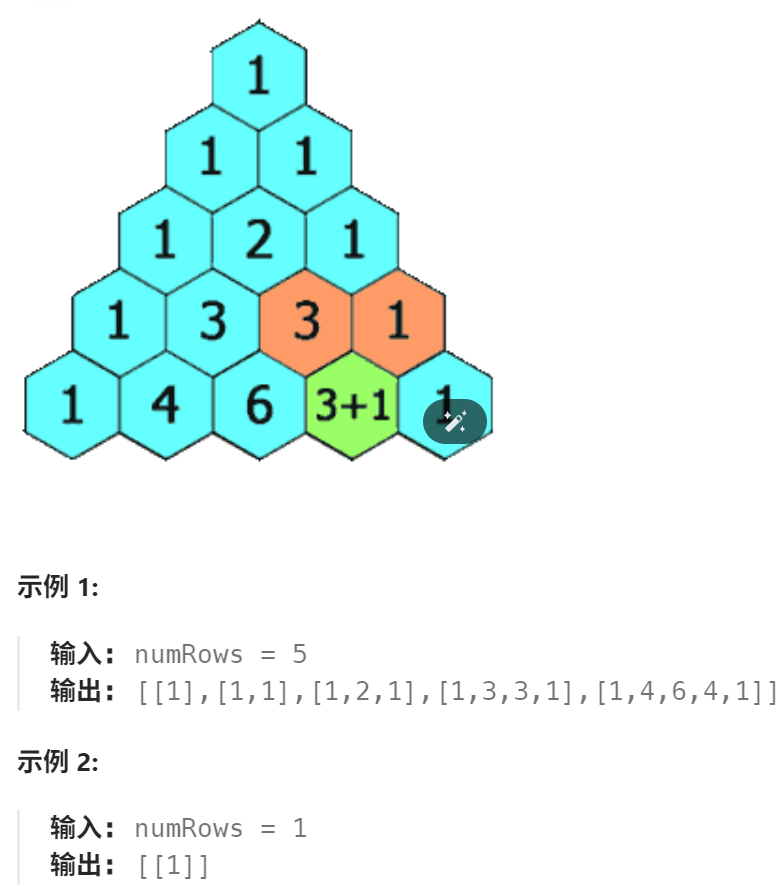

核心思路：

第 i 行（i 从 1 开始）长度就是 i。

两端固定为 1。

中间列 j（2 ≤ j ≤ i-1）由上一行相邻两数相加得到：
第 i 行第 j 列 = 第 (i-1) 行的第 (j-1) 列 + 第 (i-1) 行的第 j 列。

In [ ]:
from typing import List
class Solution:
    def generate(self, numRows: int) -> List[List[int]]:
        output = []
        for i in range(1, numRows+1):
            # 初始化当前行，首尾元素为 1
            cur = [1] * i
            for j in range(2, i):
                # 状态转移方程
                cur[j-1] = output[i-2][j-2] + output[i-2][j-1]
            output.append(cur)
        return output
numRows = 5
print(Solution().generate(numRows))

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]


时间复杂度方面：
外层循环从 i = 1 到 numRows，一共执行 numRows 次。
第 i 行内部有一个长度为 i 的数组初始化（[1] * i），这是 O(i)。
随后内层循环 j 从 2 到 i−1，执行约 i−2 次，每一步是常数时间的加法。
因此第 i 行的总体时间是 O(i)。
将所有行累加，总时间复杂度为
O(1 + 2 + 3 + … + numRows) = O(numRows²)。

空间复杂度方面：
输出结果 output 本身需要存储杨辉三角的全部元素，总元素个数为
1 + 2 + … + numRows = O(numRows²)。
除输出外，只使用了常数级的临时变量（cur 指向当前行，不额外叠加存储）。
因此额外空间复杂度（不计输出）为 O(1)，
总空间复杂度（计入输出）为 O(numRows²)。

## 198. 打家劫舍

你是一个专业的小偷，计划偷窃沿街的房屋。每间房内都藏有一定的现金，影响你偷窃的唯一制约因素就是相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警。

给定一个代表每个房屋存放金额的非负整数数组，计算你 不触动警报装置的情况下 ，一夜之内能够偷窃到的最高金额。

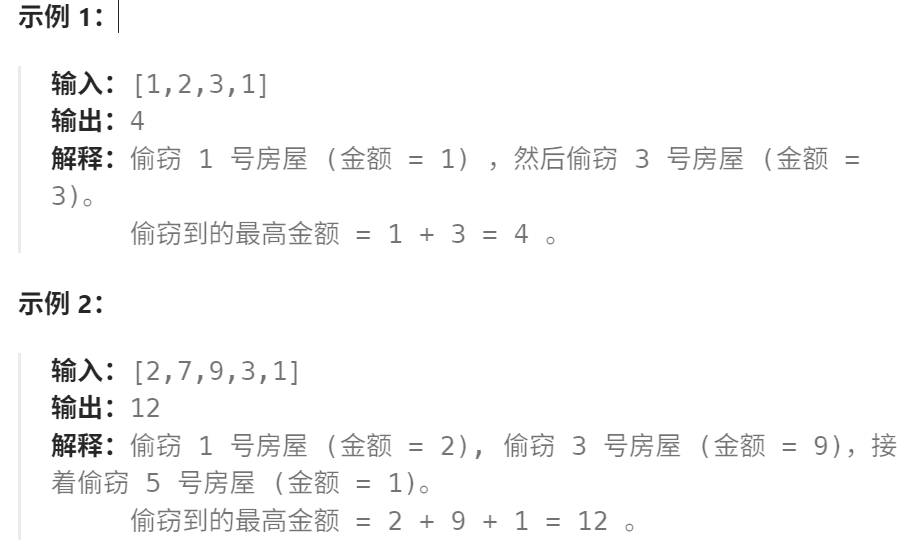

到第 i 间房时只有两种选择：不偷（保持前一家的最优），或偷（当前金额 + 前两家的最优）。
取两者最大即可，像斐波那契那样滚动更新。

In [23]:
from typing import List

class Solution:
    def rob(self, nums: List[int]) -> int:
        """
        dp[i] 表示考虑到第 i 间房（下标 i），能偷到的最高金额。
        转移：要么不偷 i（保持 dp[i-1]），要么偷 i（nums[i] + dp[i-2]）
             dp[i] = max(dp[i-1], dp[i-2] + nums[i])
        只需两个变量滚动保存 dp[i-2], dp[i-1]，空间 O(1)。
        """
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        # 初始化 dp[0] 和 dp[1]
        dp_i_2 = nums[0]
        dp_i_1 = max(nums[0], nums[1])

        # 从第 2 间（下标 2）开始迭代
        for i in range(2, n):
            # 状态转移方程
            dp_i = max(dp_i_1, dp_i_2 + nums[i])
            # 滚动更新 dp[i-2] 和 dp[i-1] 的值
            dp_i_2, dp_i_1 = dp_i_1, dp_i

        return dp_i_1
nums = [1,2,3,1]
print(Solution().rob(nums))

4


时间复杂度：
代码只对数组 nums 做了一次线性遍历。初始化是常数时间，for i in range(2, n) 循环执行 n−2 次，每一步只包含常数次比较与加法运算。因此整体时间复杂度为 O(n)。

空间复杂度：
算法未使用与 n 成比例的额外数据结构，仅使用了 dp_i_2、dp_i_1、cur 等常数个变量来滚动保存状态。因此 额外空间复杂度为 O(1)。
需要注意的是，输入数组 nums 不计入额外空间。

---

## 279. 完全平方数

给你一个整数 n ，返回 和为 n 的完全平方数的最少数量 。

完全平方数 是一个整数，其值等于另一个整数的平方；换句话说，其值等于一个整数自乘的积。例如，1、4、9 和 16 都是完全平方数，而 3 和 11 不是。

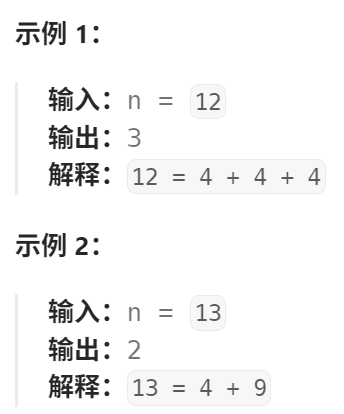

核心思路（DP，完全背包视角）

定义：dp[i] 表示凑成和为 i 的最少完全平方数个数。

转移（最后一步法）：枚举所有平方数 s ∈ {1,4,9,..., s≤i}，
dp[i] = min(dp[i], dp[i - s] + 1)
含义：最后一次放入平方数 s，前面已把 i-s 最优凑好。

初始化：dp[0]=0；其余设大数（如 n+1）。从 i=1..n 递推即可。

In [ ]:
class Solution:
    def numSquares(self, n: int) -> int:
        nums = []
        # 初始化 dp 数组, dp[i] 表示组成整数 i 的最少完全平方数的数量
        dp = [0] * (n+1)
        for i in range(n+1):
            dp[i] = i

        # 预先计算所有不超过 n 的完全平方数
        k = 1
        while k*k <= n:
            nums.append(k*k)
            k += 1
        for i in range(1, n+1):
            for s in nums:
                if s > i:
                    break
                # 状态转移方程
                dp[i] = min(dp[i], dp[i-s] + 1)
        return dp[-1]
n = 13
print(Solution().numSquares(n))

2


复杂度分析
设 n 为输入值，不超过 n 的平方数个数为 ⌊√n⌋。外层循环遍历 i=1…n，内层循环遍历所有平方数，因此时间复杂度为 O(n√n)。
使用了长度为 n+1 的 dp 数组，以及一个大小为 √n 的平方数列表，主导空间开销来自 dp 数组，因此空间复杂度为 O(n)。

## 322. 零钱兑换

给你一个整数数组 coins ，表示不同面额的硬币；以及一个整数 amount ，表示总金额。

计算并返回可以凑成总金额所需的 最少的硬币个数 。如果没有任何一种硬币组合能组成总金额，返回 -1 。

你可以认为每种硬币的数量是无限的。

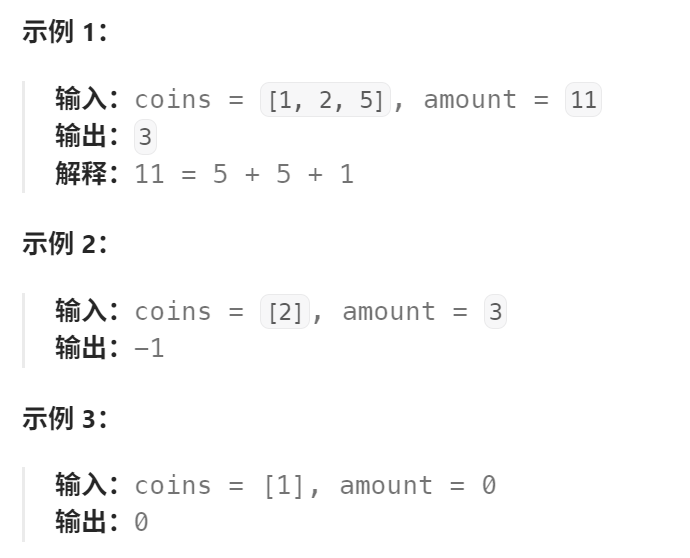

核心思路：

与完全平方数思路相同，注意最后对dp[-1]的检查，以及不需要每个时刻检查是否能完成零钱兑换，完成不了，他的最小组合是amount+1,后续也不会使用到该状态

In [40]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        coins.sort()
        # 初始化 dp 数组，dp[i] 表示组成整数 i 的最少硬币数量
        dp = [0] + [amount+1] * amount

        for i in range(1, amount+1):
            for j in coins:
                if j > i:
                    break
                # 状态转移方程
                dp[i] = min(dp[i], dp[i-j] + 1)
        # 如果 dp[amount] 仍然是初始值，说明无法组成 amount，返回 -1
        return dp[amount] if dp[amount] < amount + 1 else -1
coins = [1, 2, 5]
amount = 11
print(Solution().coinChange(coins, amount))

3


这是一个**完全背包的一维动态规划解法**，

时间复杂度方面。
外层循环遍历金额 i 从 1 到 amount，共 amount 次；内层循环遍历硬币面值 coins，最坏情况下每个 i 都需要遍历全部硬币数量 m。排序带来的 O(m log m) 只执行一次，且通常远小于 DP 主循环。因此总体时间复杂度为 **O(amount × m)**，排序为次要开销。

空间复杂度方面。
使用了一个长度为 amount+1 的一维 dp 数组，dp[i] 表示凑成金额 i 所需的最少硬币数；除 dp 外只使用常数级变量。因此**空间复杂度为 O(amount)**。

补充说明。
排序 coins 的作用是利用 `j > i` 提前 break，在平均情况下可以减少内层循环次数，但不改变最坏情况下的渐进复杂度。

---

## 139. 单词拆分

给你一个字符串 s 和一个字符串列表 wordDict 作为字典。如果可以利用字典中出现的一个或多个单词拼接出 s 则返回 true。

注意：不要求字典中出现的单词全部都使用，并且字典中的单词可以重复使用。

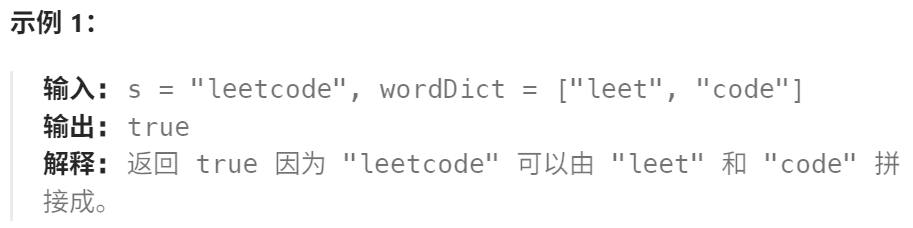

核心思路：

定义状态：dp[i] 表示前缀 s[:i] 能否由字典单词拼出。

初始：dp[0] = True（空串可被“空选择”拼出）。

转移：枚举切分点 j < i，若 dp[j] == True 且 s[j:i] 在字典中，则 dp[i] = True。

剪枝：只枚举长度不超过字典里最长单词长度的后缀 s[j:i]，显著减少循环次数。

答案：返回 dp[n]。

In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        n = len(s)
        # 初始化，dp[i] 表示 s[:i] 是否可由字典中的单词拼接而成；空串可拆分
        dp = [True] + [False] * n

        # 按长度升序，便于在内层循环遇到过长单词时提前 break
        wordDict.sort(key=lambda x: len(x))

        for i in range(1, n + 1):
            for w in wordDict:
                j = len(w)
                if i < j:               # 当前前缀长度不足以匹配 w，后续更长的 w 也不必看
                    break
                # 状态转移方程，若 s[:i-j] 可拆分，且末尾子串等于字典词 w，则 s[:i] 可拆分
                if dp[i - j] and s[i - j:i] == w:
                    dp[i] = True
                    break     # 已成立可提前结束本轮
        return dp[-1]
s = "leetcode"
wordDict = ["leet", "code"]
print(Solution().wordBreak(s, wordDict))

True


时间复杂度：
设字符串长度为 n，字典中单词个数为 m，单词的平均长度为 L（最大长度为 L_max）。

1）排序字典：
`wordDict.sort(key=len)` 的时间复杂度为 O(m log m)。

2）动态规划双重循环：
外层循环 i 从 1 到 n，共 n 次。
内层遍历字典中的单词，最坏情况下需要检查所有 m 个单词。
对每个单词 w，会进行一次子串比较 `s[i-j:i] == w`，该操作的时间复杂度为 O(len(w))，平均可视为 O(L)。

因此，DP 部分的最坏时间复杂度为：
O(n × m × L)

综合起来，总时间复杂度为：
O(m log m + n · m · L)

在实际运行中，由于：

* 字典按长度排序后可提前 break；
* 一旦 dp[i] 成立就提前结束内层循环；

平均复杂度通常显著低于最坏情况，但理论上界仍如上。

空间复杂度：

* dp 数组长度为 n+1，占用 O(n) 空间；
* 排序字典为原地排序，不额外占用与 m 成正比的空间（忽略排序栈开销）。

因此，总空间复杂度为：
O(n)

---

## 300. 最长递增子序列

给你一个整数数组 nums ，找到其中最长严格递增子序列的长度。

子序列 是由数组派生而来的序列，删除（或不删除）数组中的元素而不改变其余元素的顺序。例如，[3,6,2,7] 是数组 [0,3,1,6,2,2,7] 的子序列。

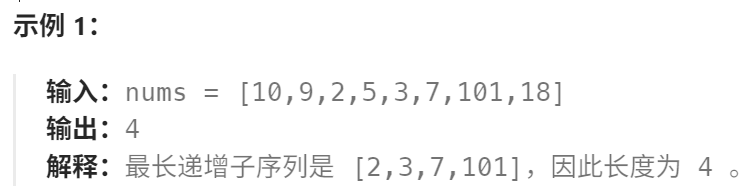

核心思路：

状态：dp[i] 表示“以 nums[i] 结尾”的 LIS 长度。

转移：看所有 j<i 且 nums[j]<nums[i]，取 max(dp[j])+1。

In [45]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        n = len(nums)
        # 初始化 dp 数组，dp[i] 表示以 nums[i] 结尾的最长递增子序列的长度
        dp = [1] * n
        
        for i in range(1, n):
            for j in range(i):
                # 状态转移方程，max一定要存在，为了遍历对比
                if nums[j] < nums[i]:
                    dp[i] = max(dp[j] + 1, dp[i])
        return  max(dp)
nums = [10,9,2,5,3,7,101,18]
print(Solution().lengthOfLIS(nums))

4


时间复杂度：
外层循环 i 从 1 到 n−1，共 n 次；
内层循环 j 从 0 到 i−1，平均约 n/2 次，最坏为 n 次。
每一步只做常数级比较与赋值。

因此总体时间复杂度为：
O(n²)


空间复杂度：
使用了一个长度为 n 的 dp 数组，除输入外没有额外结构。
空间复杂度为：O(n)

---

## 152. 乘积最大子数组

给你一个整数数组 nums ，请你找出数组中乘积最大的非空连续 子数组（该子数组中至少包含一个数字），并返回该子数组所对应的乘积。
测试用例的答案是一个 32-位 整数。
请注意，一个只包含一个元素的数组的乘积是这个元素的值。

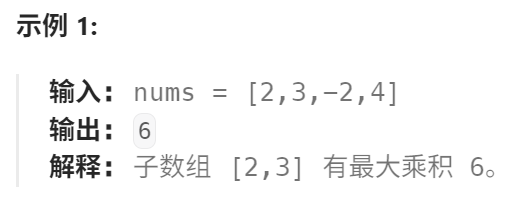

核心思路：

1.需要保存每一个状态的最大值和最小值，因为最小值更有可能是为负的大数，再乘上一个负数可以变为最大

2.需要记录下目前最大值，与下一刻时刻的最大值进行比较，一直保留全局最大值

In [ ]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        result = max_arr = min_arr = nums[0]
        n = len(nums)
        for i in range(1, n):
            # 记录上一个状态的最大值，否则会被更新覆盖
            cur_max = max_arr
            max_arr = max(max_arr*nums[i], min_arr*nums[i], nums[i])
            min_arr = min(cur_max*nums[i], min_arr*nums[i], nums[i])
            result = max(max_arr, result)
        return result

nums = [2,3,-2,4]
print(Solution().maxProduct(nums))

6


时间复杂度：
该算法只对数组进行了一次线性扫描，循环中每一步都是常数时间操作。O(n)

空间复杂度：
只使用了有限个变量（result、max_scores、min_scores、num），不依赖于输入规模。O(1)

---

## 416. 分割等和子集

给你一个 只包含正整数 的 非空 数组 nums 。请你判断是否可以将这个数组分割成两个子集，使得两个子集的元素和相等。

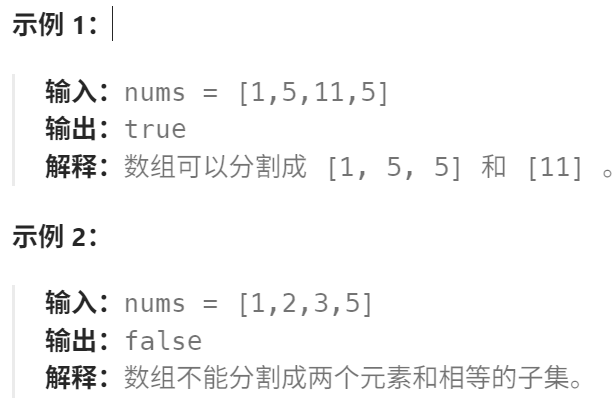

核心思路：

把问题转化为“是否能选出若干数使得和为 sum(nums)/2”的可达性判断。

一维 0/1 背包：dp[0]=True；对每个数 x，倒序更新 s：dp[s] |= dp[s-x]。

结果看 dp[target]。

In [ ]:
class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        sum_nums = sum(nums)
        if sum_nums%2 == 1:
            return False
        #（1）用 / 2 会得到 float，dp[target] 会报错，必须要用 // ,会得到整数
        #（2）这里面的物品只能用一次，因此需要先遍历物品，且逆序遍历背包
        target = sum_nums // 2

        if max(nums) > target:
            return False
        
        dp = [True] + [False] * target
        for i in nums:
            s = target
            while s >= i:
                if dp[s-i]:
                    dp[s] = True
                s -= 1
            if dp[-1]:
                return True
        return False
        
nums = [1,5,11,5]
print(Solution().canPartition(nums))

True


时间复杂度：
设数组长度为 n，数组元素和为 S，目标容量为 target = S / 2。

外层循环遍历每一个元素 nums[i]，共 n 次；
内层是一个从 target 逆序到 nums[i] 的循环，最坏情况下需要 target 次。

因此总体时间复杂度为：
O(n · target)
也可写为：
O(n · (S / 2))，通常简记为 O(n · S)。

空间复杂度：
使用了一维 dp 数组，长度为 target + 1，其余只使用常数额外变量。

空间复杂度为：
O(target)，即 O(S)。

---

## 32. 最长有效括号

给你一个只包含 '(' 和 ')' 的字符串，找出最长有效（格式正确且连续）括号 子串 的长度。

左右括号匹配，即每个左括号都有对应的右括号将其闭合的字符串是格式正确的，比如 "(()())"

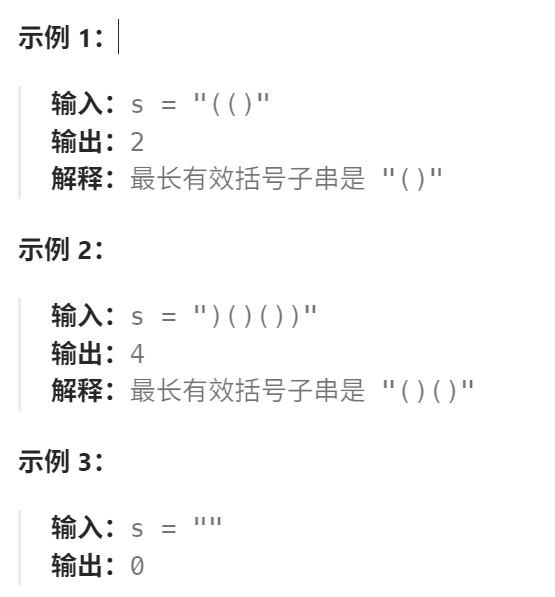


核心思路:

把“括号是否匹配”转化为“以当前位置结尾的最优子结构”，并在遇到右括号时，向前跳过已匹配区间寻找对应的左括号。

定义状态：
dp[i] 表示 以索引 i 结尾的最长有效括号子串长度。
若 s[i] == '('，则 dp[i] = 0

若 s[i] == ')'，才需要讨论

关键在于：这个右括号 ')' 能不能和前面的某个 '(' 配对。

二、状态转移分两种情况

设当前字符是 s[i] == ')'。

情况 1：前一个字符是 '('
即形如 "()"，那么：

dp[i] = 2 + dp[i-2]


dp[i-2] 表示在 "()" 之前，是否还能再接一段有效括号。

情况 2：前一个字符是 ')'
即形如 "…))"，需要向前“跳过”一段已经匹配好的括号：

j = i - dp[i-1] - 1


如果 j >= 0 且 s[j] == '('，说明可以匹配：

dp[i] = dp[i-1] + 2 + dp[j-1]


dp[j-1] 用来接上更前面可能存在的有效括号。



In [60]:
from typing import List

class Solution:
    def longestValidParentheses(self, s: str) -> int:
        n = len(s)

        # dp[i] 表示：以 i 位置字符结尾的「最长连续有效括号子串长度」
        # 注意：必须“以 i 结尾”，这是状态定义的关键
        dp = [0] * n

        # 记录全局最大值
        res = 0

        # 从 1 开始遍历，因为 i=0 不可能形成有效括号
        for i in range(1, n):

            # 只有当当前位置是 ')' 时，才可能形成有效括号
            if s[i] == ')':

                # ------------------------
                # 情况 1：形如 "()"
                # ------------------------
                # 当前是 ')'
                # 前一个字符是 '('
                # 那么 s[i-1:i+1] = "()"
                if s[i-1] == '(':

                    # "()” 本身贡献 2
                    # 如果 i >= 2，还可以接上 i-2 位置结尾的有效括号
                    # 例如："(())" -> dp[3] = dp[1] + 2
                    dp[i] = (dp[i-2] if i >= 2 else 0) + 2

                # ------------------------
                # 情况 2：形如 "...))"
                # ------------------------
                # 这是最难理解、也是最关键的一种情况
                else:
                    # 先解释 dp[i-1] 的含义：
                    # dp[i-1] 表示：以 i-1 结尾的最长有效括号长度
                    #
                    # 举例：
                    # s = "... ( ( ) ) )"
                    #            ^   ^
                    #          i-1   i
                    #
                    # dp[i-1] 覆盖的是一整段已经“完全匹配”的括号

                    # 那么，我们想做的是：
                    # 在 dp[i-1] 这段「已匹配区间」的前面，
                    # 看能不能再找到一个 '(' 来和当前 s[i] = ')' 匹配

                    # i - dp[i-1] 是：那段已匹配区间的起始位置
                    # 再减 1，就是我们要检查的“候选 '(' 位置”
                    j = i - dp[i-1] - 1

                    # 如果 j 合法，且 s[j] == '('
                    # 说明：
                    # s[j] 可以和当前 s[i] 这一个 ')' 配对
                    if j >= 0 and s[j] == '(':

                        # 先把：
                        # 1）原本 dp[i-1] 的那一整段有效括号
                        # 2）新匹配的一对 "()"
                        # 合在一起
                        dp[i] = dp[i-1] + 2

                        # 但这还不够！
                        # 如果 j > 0，说明在 s[j] 前面，也就是 s[j-1] 位置，还存在一个字符
                        # 可能还存在一段“更早的有效括号”，因此在dp[i] 的基础上，还要加上 dp[j-1] 的长度
                        #
                        # 例如：
                        # s = "() ( ( ) )"
                        #       ^ j     i
                        #
                        # dp[j-1] 是可以无缝接在当前结构前面的
                        if j >= 1:
                            dp[i] += dp[j-1]

                # 更新全局最大值
                res = max(res, dp[i])

        return res

s = "()(())"
print(Solution().longestValidParentheses(s))

6


In [ ]:
from typing import List

class Solution:
    def longestValidParentheses(self, s: str) -> int:
        n = len(s)
        dp = [0] * n
        res = 0

        for i in range(1, n):
            if s[i] == ')':
                # 情况1："()"
                if s[i-1] == '(':
                    dp[i] = (dp[i-2] if i >= 2 else 0) + 2
                else:
                    # 情况2："...))"
                    j = i - dp[i-1] - 1
                    if j >= 0 and s[j] == '(':
                        dp[i] = dp[i-1] + 2
                        if j >= 1:
                            dp[i] += dp[j-1]
                res = max(res, dp[i])
        return res


# 示例
s = "(()())"
print(Solution().longestValidParentheses(s))  # 输出 6


6


时间复杂度：
只遍历字符串一次，每个位置是 O(1) 操作：
O(n)

空间复杂度：
使用了一个长度为 n 的 dp 数组：
O(n)

背包问题总结：

0/1背包卡哥解读：

https://programmercarl.com/%E8%83%8C%E5%8C%85%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%8001%E8%83%8C%E5%8C%85-1.html#%E6%80%9D%E8%B7%AF

https://programmercarl.com/%E8%83%8C%E5%8C%85%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%8001%E8%83%8C%E5%8C%85-2.html#%E6%80%9D%E8%B7%AF

完全背包卡哥解读：

https://programmercarl.com/%E8%83%8C%E5%8C%85%E9%97%AE%E9%A2%98%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%80%E5%AE%8C%E5%85%A8%E8%83%8C%E5%8C%85.html#%E5%AE%8C%E5%85%A8%E8%83%8C%E5%8C%85

动态规划总结：

https://programmercarl.com/%E5%8A%A8%E6%80%81%E8%A7%84%E5%88%92%E6%80%BB%E7%BB%93%E7%AF%87.html#%E5%8A%A8%E8%A7%84%E7%BB%93%E6%9D%9F%E8%AF%AD

0/1 背包（每件最多一次）：✅
先物品，后容量且“逆序”（避免同一轮重复用到当前物品）。

完全背包（可无限次）：要分两类——

求最优值（最大/最小）或求“组合数”（顺序不敏感）：✅
先物品，后容量且“正序”。

求“排列数”（顺序敏感，如“先放 1 再放 2”和“先放 2 再放 1”算两种）：
先容量，后物品且“正序”。
